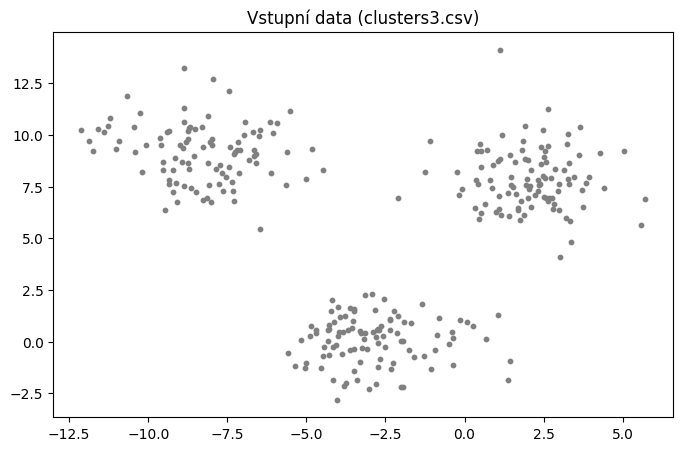

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datasets/ml_03/clusters3.csv', sep=';', names=["x", "y"])
X = df.values

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.title("Vstupní data (clusters3.csv)")
plt.show()

In [7]:
import numpy as np

class DBSCANScratch:
    def __init__(self, eps, min_samples):
        # eps: max vzdylenost pro hledani sousedu
        # min_samples: min počet kamaradu pro označení jako jadro 

        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, X):
        # Inicializace: -2 = nenavštíveno, -1 = šum, 0+ = ID shluku
        self.labels = np.full(X.shape[0], -2) 
        cluster_id = 0
        
        for i in range(X.shape[0]):
            # pokračujem pouze pokud neni navštiven
            if self.labels[i] != -2:
                continue
            
            # Najdeme kamoše pro aktualni bodu 
            neighbors = self._get_neighbors(X, i)
            
            if len(neighbors) < self.min_samples:
                # Bod je zatím šum
                self.labels[i] = -1
            else:
                # Bod je jádrový, začneme rozšiřovat shluk
                self._expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1
        
        return self.labels

    def _get_neighbors(self, X, point_idx):
        # vypočet vzdušne vzdálenosti 
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        
        # returnuje indexy bodů < eps
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id):
  
        # Přiřazení aktuálního bodu do shluku
        self.labels[point_idx] = cluster_id
        
        # Fronta bodů k prozkoumání
        queue = list(neighbors)
        
        while queue:
            current_point = queue.pop(0)
            
            # Pokud byl bod dříve označen jako šum, nyní se stává součástí shluku
            if self.labels[current_point] == -1:
                self.labels[current_point] = cluster_id
            
            # Pokud bod ještě nebyl navštíven
            if self.labels[current_point] == -2:
                self.labels[current_point] = cluster_id
                # Hledání sousedů pro nově přidaný bod
                new_neighbors = self._get_neighbors(X, current_point)
                
                # Pokud je nový bod také jádrový, přidáme jeho sousedy do fronty
                if len(new_neighbors) >= self.min_samples:
                    queue.extend(new_neighbors)

Moje implementace: Čas = 0.0149s
Scikit-learn: Čas = 0.0020s


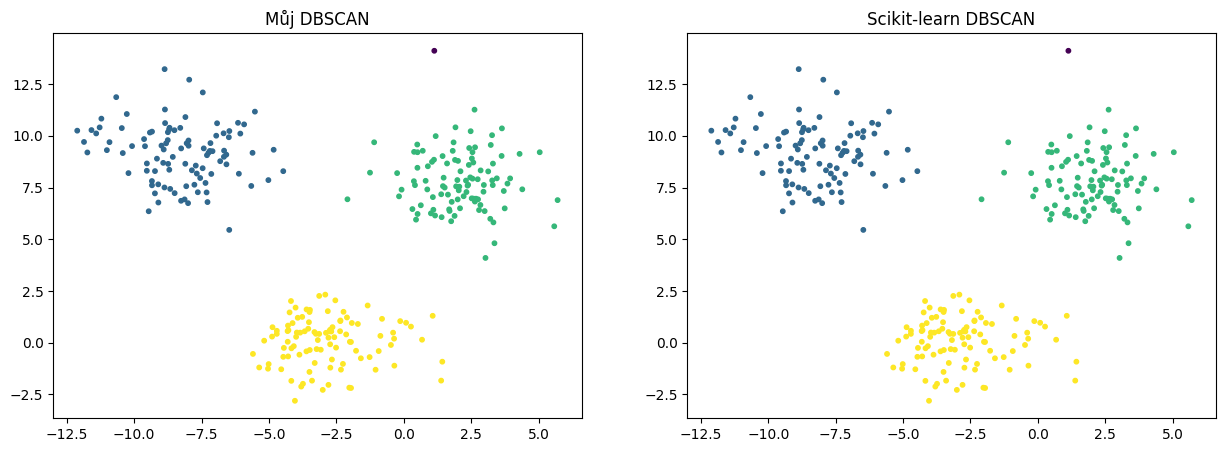

In [3]:
# Nastavení parametrů
EPS = 2.7
MIN_SAMPLES = 10

# Měření moji verze
start = time.time()
my_dbscan = DBSCANScratch(eps=EPS, min_samples=MIN_SAMPLES)
my_labels = my_dbscan.fit(X)
my_time = time.time() - start

# Měření Scikit-learn verze
start = time.time()
sk_dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
sk_labels = sk_dbscan.fit_predict(X)
sk_time = time.time() - start

print(f"Moje implementace: Čas = {my_time:.4f}s")
print(f"Scikit-learn: Čas = {sk_time:.4f}s")

# Vizualizace výsledků
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis', s=10)
ax1.set_title("Můj DBSCAN")

ax2.scatter(X[:, 0], X[:, 1], c=sk_labels, cmap='viridis', s=10)
ax2.set_title("Scikit-learn DBSCAN")

plt.show()

Moje implementace: Čas = 0.0022s
Scikit-learn: Čas = 0.0010s


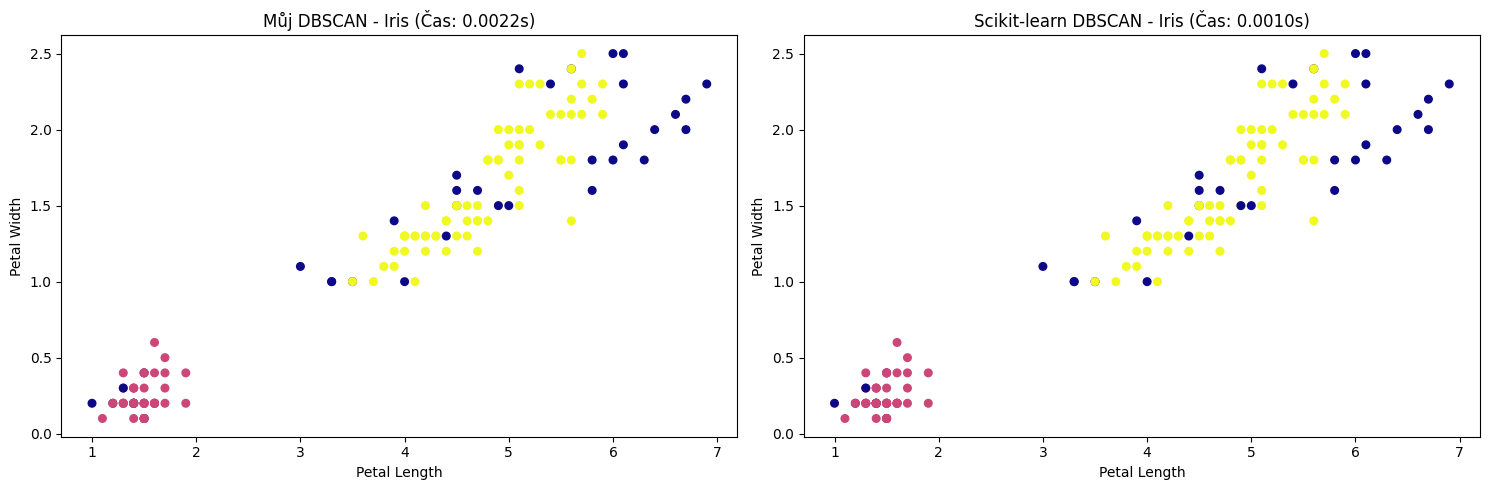

In [11]:
df_iris = pd.read_csv('datasets/ml_06/iris.csv')
X_iris = df_iris.drop('species', axis=1).values

# Normalizace dat
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Parametry pro Iris 
EPS_IRIS = 0.5
MIN_IRIS = 5

# Moje
start = time.time()
my_dbscan_iris = DBSCANScratch(eps=EPS_IRIS, min_samples=MIN_IRIS)
my_labels_iris = my_dbscan_iris.fit(X_iris_scaled)
my_time_iris = time.time() - start

# Origo
start = time.time()
sk_dbscan_iris = DBSCAN(eps=EPS_IRIS, min_samples=MIN_IRIS)
sk_labels_iris = sk_dbscan_iris.fit_predict(X_iris_scaled)
sk_time_iris = time.time() - start


print(f"Moje implementace: Čas = {my_time_iris:.4f}s")
print(f"Scikit-learn: Čas = {sk_time_iris:.4f}s")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X_iris[:, 2], X_iris[:, 3], c=my_labels_iris, cmap='plasma', s=30)
ax1.set_xlabel("Petal Length")
ax1.set_ylabel("Petal Width")
ax1.set_title(f"Můj DBSCAN - Iris ")

ax2.scatter(X_iris[:, 2], X_iris[:, 3], c=sk_labels_iris, cmap='plasma', s=30)
ax2.set_xlabel("Petal Length")
ax2.set_ylabel("Petal Width")
ax2.set_title(f"Scikit-learn DBSCAN - Iris ")

plt.tight_layout()
plt.show()

Čas tvé implementace: 1.412631 s
Čas sklearn implementace: 0.008168 s


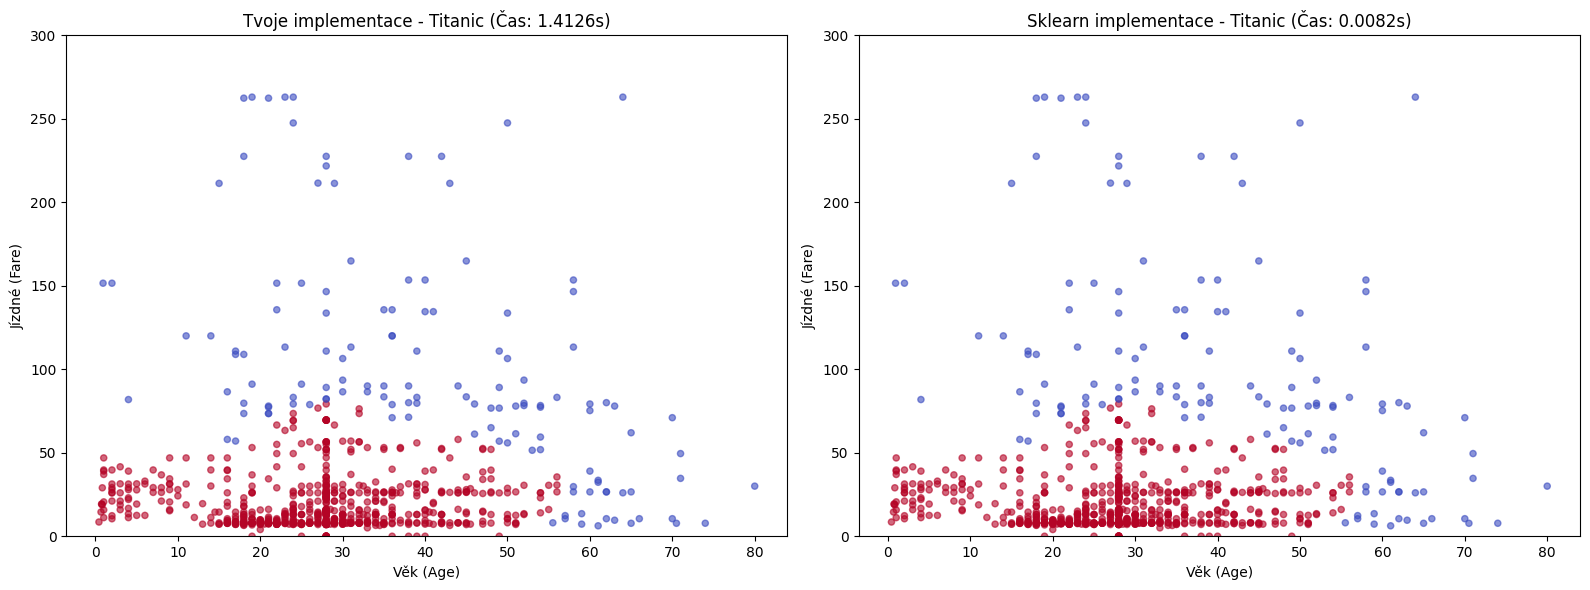

In [20]:
df_titanic = pd.read_csv('datasets/ml_06/titanic.csv')

titanic_data = df_titanic[['Age', 'Fare']].copy()
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())

X_titanic_scaled = StandardScaler().fit_transform(titanic_data.values)

EPS_TIT = 0.5
MIN_TIT = 50

# Moje
start_my = time.time()
my_dbscan_tit = DBSCANScratch(eps=EPS_TIT, min_samples=MIN_TIT)
my_labels_tit = my_dbscan_tit.fit(X_titanic_scaled)
my_time_tit = time.time() - start_my

# Origo
start_sk = time.time()
sk_dbscan_tit = DBSCAN(eps=EPS_TIT, min_samples=MIN_TIT)
sk_labels_tit = sk_dbscan_tit.fit_predict(X_titanic_scaled)
sk_time_tit = time.time() - start_sk

print(f"Čas tvé implementace: {my_time_tit:.6f} s")
print(f"Čas sklearn implementace: {sk_time_tit:.6f} s")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = ax1.scatter(titanic_data['Age'], titanic_data['Fare'], c=my_labels_tit, cmap='coolwarm', alpha=0.6, s=20)
ax1.set_xlabel("Věk (Age)")
ax1.set_ylabel("Jízdné (Fare)")
ax1.set_title(f"Tvoje implementace - Titanic ")
ax1.set_ylim(0, 300) 

scatter2 = ax2.scatter(titanic_data['Age'], titanic_data['Fare'], c=sk_labels_tit, cmap='coolwarm', alpha=0.6, s=20)
ax2.set_xlabel("Věk (Age)")
ax2.set_ylabel("Jízdné (Fare)")
ax2.set_title(f"Sklearn implementace - Titanic ")
ax2.set_ylim(0, 300)

plt.tight_layout()
plt.show()